<a href="https://colab.research.google.com/github/G100A008/Python/blob/master/%E5%B7%A8%E9%87%8F%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E6%9C%9F%E6%9C%AB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('2330.TW.csv')  # 讀取訓練集
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值

In [76]:
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-02,66.790359,66.987381,66.297806,66.691849,37.146004,26292533.0
1,2007-01-03,66.790359,67.676956,66.494827,66.987381,37.310600,42463339.0
2,2007-01-04,66.691849,67.085892,66.593338,66.691849,37.146004,22444226.0
3,2007-01-05,66.494827,66.691849,65.509720,65.903763,36.707047,30905222.0
4,2007-01-08,65.115677,65.509720,64.721634,64.820145,36.103504,24350615.0
...,...,...,...,...,...,...,...
3934,2022-12-26,454.000000,457.000000,453.500000,456.500000,456.500000,8793306.0
3935,2022-12-27,458.000000,462.500000,457.000000,457.000000,457.000000,10264001.0
3936,2022-12-28,451.000000,452.000000,446.000000,451.000000,451.000000,32578949.0
3937,2022-12-29,444.000000,449.500000,442.500000,446.000000,446.000000,23020759.0


In [77]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [78]:
X_train = []   #預測點的前 365 天的資料
y_train = []   #預測點
for i in range(365, 3939):  # 3939 是訓練集總數
    X_train.append(training_set_scaled[i-365:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

In [79]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [80]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [81]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [82]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
 48/112 [===========>..................] - ETA: 48s - loss: nan

In [60]:
dataset_test = pd.read_csv('2330.TW.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [63]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(365, 500):  # timesteps一樣365； 425= 先前的365天資料+2024年的60天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

In [64]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

5/5 [==============================] - 1s 78ms/step


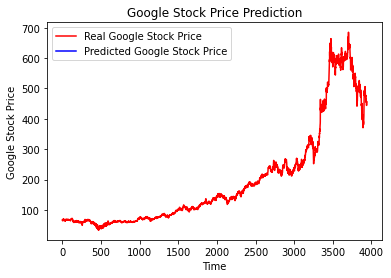

In [65]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()